In [1]:
import pandas as pd;
import numpy as np;

import matplotlib.pyplot as plt;

In [2]:
from tensorflow.keras.datasets import mnist;

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data();

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
sample_image = X_train[0]

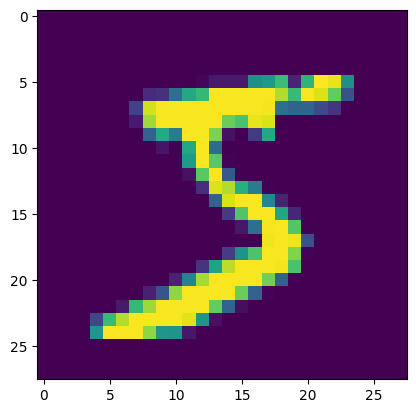

In [6]:
plt.imshow(sample_image);

In [7]:
from tensorflow.keras.utils import to_categorical;

In [8]:
y_example = to_categorical(y_train);

In [9]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D;

In [12]:
X_train = X_train / 255;
X_test = X_test / 255;

y_cat_train = to_categorical(y_train, 10);
y_cat_test = to_categorical(y_test,10)

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1);
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1);

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [57]:
model = Sequential();

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = "relu"));
model.add(MaxPool2D(pool_size = (2,2)));

model.add(Flatten());

model.add(Dense(256, activation = "relu"));

model.add(Dense(10, activation = "softmax"));

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]);

In [58]:
from tensorflow.keras.callbacks import EarlyStopping;

In [59]:
early_stop = EarlyStopping(monitor = "accuracy", patience = 1, mode = "max");

In [60]:
model.fit(X_train, y_cat_train, epochs = 5, callbacks = [early_stop],
         verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1277 - accuracy: 0.9614
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0179 - accuracy: 0.9942
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9961


In [61]:
model.history.history

{'loss': [0.12770655751228333,
  0.04327205568552017,
  0.026452770456671715,
  0.0179152712225914,
  0.01227823831140995],
 'accuracy': [0.9613833427429199,
  0.9867833256721497,
  0.9916166663169861,
  0.994183361530304,
  0.9960833191871643]}

In [62]:
stat_dataset = pd.DataFrame(model.history.history);

<AxesSubplot: >

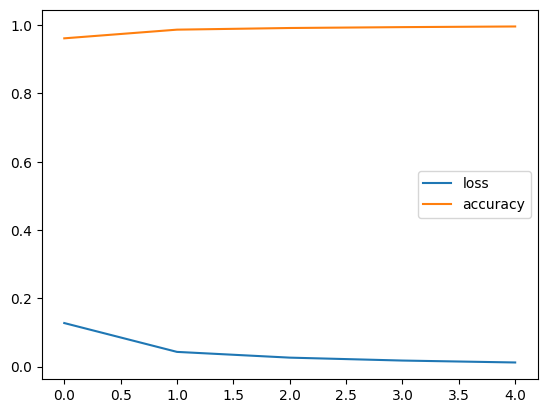

In [63]:
stat_dataset.plot()